In [111]:
# Import necessary libraries
import pandas as pd

# Define the file path (файл має бути завантажений в поточну директорію Colab)
file_path = 'ML requirement.xlsx'

# Load data from the Excel file
plan_data = pd.read_excel(file_path, sheet_name='Plan')
forecast_data = pd.read_excel(file_path, sheet_name='Forecast')
actuals_data = pd.read_excel(file_path, sheet_name='Actuals')

# Check if data is loaded correctly
print("Sheets loaded successfully!")

# Display the first few rows of each dataframe
print("\nPlan Data:")
print(plan_data.head())

print("\nForecast Data:")
print(forecast_data.head())

print("\nActuals Data:")
print(actuals_data.head())

Sheets loaded successfully!

Plan Data:
   DEPLETION_PERIOD BRAND_GROUP STRATEGIC_PRIORITY CATEGORY     BRAND  \
0            202301  Blue Ridge           Maintain    Vodka  Hangar 1   
1            202301  Blue Ridge           Maintain    Vodka  Hangar 1   
2            202301  Blue Ridge           Maintain    Vodka  Hangar 1   
3            202301  Blue Ridge           Maintain    Vodka  Hangar 1   
4            202301  Blue Ridge           Maintain    Vodka  Hangar 1   

        MARKET     DIVISION PACKAGE_SIZE        LABEL  \
0     Illinois      SGWS-JB           1L  H1 Straight   
1      Florida    RNDC East           1L  H1 Straight   
2      Florida    RNDC East           1L  H1 Straight   
3  Connecticut  Independent         .75L  H1 Straight   
4      Florida    RNDC East           1L  H1 Straight   

                              DISTRIBUTOR ULTIMATE_DISTRIBUTOR     PRICE_TIER  \
0        Southern Wine & Spirits - IL, IL                 SGWS  Super Premium   
1  Republic Nati

In [112]:
# Step 1: Вибрати колонки з місячними обсягами
volume_columns = [col for col in actuals_data.columns if 'VOLUME' in col and 'Depletion Month' in col]

# Step 2: Перетворити в "довгий" формат (unpivot)
actuals_long = actuals_data.melt(
    id_vars=['Brands', 'Labels', 'Pricing Strategies', 'Spirit Types',
             'Ultimate Distributors', 'Markets', 'Divisions'],  # Зберігаємо ці колонки
    value_vars=volume_columns,
    var_name='DEPLETION_PERIOD',
    value_name='VOLUME'
)

# Step 3: Очистити колонку `DEPLETION_PERIOD` для отримання дати
actuals_long['DEPLETION_PERIOD'] = actuals_long['DEPLETION_PERIOD'].str.extract(r'(\w+ \d{4})')

# Step 4: Перетворити `DEPLETION_PERIOD` у формат datetime
actuals_long['DEPLETION_PERIOD'] = pd.to_datetime(actuals_long['DEPLETION_PERIOD'], format='%b %Y', errors='coerce')

# Step 5: Перейменувати колонки для уніфікації з Plan і Forecast
actuals_long.rename(columns={
    'Brands': 'BRANDS',
    'Labels': 'LABELS',
    'Pricing Strategies': 'PRICING_STRATEGIES',
    'Spirit Types': 'SPIRIT_TYPES',
    'Ultimate Distributors': 'ULTIMATE_DISTRIBUTORS',
    'Markets': 'MARKETS',
    'Divisions': 'DIVISIONS'
}, inplace=True)

# Step 6: Вибрати всі колонки, включаючи додаткові
actuals_data = actuals_long[['DEPLETION_PERIOD', 'BRANDS', 'LABELS', 'PRICING_STRATEGIES',
                             'SPIRIT_TYPES', 'ULTIMATE_DISTRIBUTORS', 'MARKETS',
                             'DIVISIONS', 'VOLUME']]

# Step 7: Перевірити результат
print("Transformed Actuals Data:")
print(actuals_data.head(10))

Transformed Actuals Data:
  DEPLETION_PERIOD       BRANDS      LABELS           PRICING_STRATEGIES  \
0       2023-01-01  JC Especial  JCE Silver  Jose Cuervo Especial Silver   
1       2023-01-01  JC Especial  JCE Silver  Jose Cuervo Especial Silver   
2       2023-01-01  JC Especial  JCE Silver  Jose Cuervo Especial Silver   
3       2023-01-01  JC Especial  JCE Silver  Jose Cuervo Especial Silver   
4       2023-01-01  JC Especial  JCE Silver  Jose Cuervo Especial Silver   
5       2023-01-01  JC Especial    JCE Gold    Jose Cuervo Especial Gold   
6       2023-01-01  JC Especial    JCE Gold    Jose Cuervo Especial Gold   
7       2023-01-01  JC Especial    JCE Gold    Jose Cuervo Especial Gold   
8       2023-01-01  JC Especial    JCE Gold    Jose Cuervo Especial Gold   
9       2023-01-01  JC Especial    JCE Gold    Jose Cuervo Especial Gold   

  SPIRIT_TYPES ULTIMATE_DISTRIBUTORS      MARKETS    DIVISIONS        VOLUME  
0      Tequila                  RNDC      Florida    RNDC 

In [113]:
# Step 1: Перейменувати спільні колонки в таблицях
# Уніфікація назв колонок для Plan
plan_data.rename(columns={
    'DEPLETION_PERIOD': 'DEPLETION_PERIOD',
    'BRAND': 'BRANDS',
    'LABEL': 'LABELS',
    'ULTIMATE_DISTRIBUTOR': 'ULTIMATE_DISTRIBUTORS',
    'MARKET': 'MARKETS',
    'DIVISION': 'DIVISIONS',
    'VOLUME': 'PLAN_VOLUME'
}, inplace=True)

# Уніфікація назв колонок для Forecast
forecast_data.rename(columns={
    'DEPLETION_PERIOD': 'DEPLETION_PERIOD',
    'BRANDS': 'BRANDS',
    'LABELS': 'LABELS',
    'ULTIMATE_DISTRIBUTORS': 'ULTIMATE_DISTRIBUTORS',
    'MARKETS': 'MARKETS',
    'DIVISIONS': 'DIVISIONS',
    'VOLUME': 'FORECAST_VOLUME'
}, inplace=True)

# Уніфікація назв колонок для Actuals
actuals_data.rename(columns={
    'DEPLETION_PERIOD': 'DEPLETION_PERIOD',
    'BRANDS': 'BRANDS',
    'LABELS': 'LABELS',
    'ULTIMATE_DISTRIBUTORS': 'ULTIMATE_DISTRIBUTORS',
    'MARKETS': 'MARKETS',
    'DIVISIONS': 'DIVISIONS',
    'VOLUME': 'ACTUAL_VOLUME'
}, inplace=True)

# Step 2: Перевірити результат
print("Plan Data Columns:", plan_data.columns)
print("Forecast Data Columns:", forecast_data.columns)
print("Actuals Data Columns:", actuals_data.columns)

Plan Data Columns: Index(['DEPLETION_PERIOD', 'BRAND_GROUP', 'STRATEGIC_PRIORITY', 'CATEGORY',
       'BRANDS', 'MARKETS', 'DIVISIONS', 'PACKAGE_SIZE', 'LABELS',
       'DISTRIBUTOR', 'ULTIMATE_DISTRIBUTORS', 'PRICE_TIER', 'MARKET_TYPE',
       'PREMISE', 'PLAN_VOLUME'],
      dtype='object')
Forecast Data Columns: Index(['DEPLETION_PERIOD', 'BRANDS', 'MARKETS', 'DIVISIONS', 'PACKAGE_SIZES',
       'LABELS', 'ULTIMATE_DISTRIBUTORS', 'PRICE_TIER', 'MARKET_TYPE',
       'SALES_DIRECTOR', 'FORECAST_VOLUME'],
      dtype='object')
Actuals Data Columns: Index(['DEPLETION_PERIOD', 'BRANDS', 'LABELS', 'PRICING_STRATEGIES',
       'SPIRIT_TYPES', 'ULTIMATE_DISTRIBUTORS', 'MARKETS', 'DIVISIONS',
       'ACTUAL_VOLUME'],
      dtype='object')


In [114]:
print("Missing values in Plan Data:")
print(plan_data.isnull().sum())

print("\nMissing values in Forecast Data:")
print(forecast_data.isnull().sum())

print("\nMissing values in Actuals Data:")
print(actuals_data.isnull().sum())

Missing values in Plan Data:
DEPLETION_PERIOD         0
BRAND_GROUP              0
STRATEGIC_PRIORITY       0
CATEGORY                 0
BRANDS                   0
MARKETS                  0
DIVISIONS                0
PACKAGE_SIZE             0
LABELS                   0
DISTRIBUTOR              0
ULTIMATE_DISTRIBUTORS    0
PRICE_TIER               0
MARKET_TYPE              0
PREMISE                  0
PLAN_VOLUME              0
dtype: int64

Missing values in Forecast Data:
DEPLETION_PERIOD            0
BRANDS                      0
MARKETS                     0
DIVISIONS                   0
PACKAGE_SIZES               0
LABELS                      0
ULTIMATE_DISTRIBUTORS       0
PRICE_TIER                  0
MARKET_TYPE                 0
SALES_DIRECTOR              0
FORECAST_VOLUME          4607
dtype: int64

Missing values in Actuals Data:
DEPLETION_PERIOD         0
BRANDS                   0
LABELS                   0
PRICING_STRATEGIES       0
SPIRIT_TYPES             0
ULTIMATE

In [115]:
forecast_data['FORECAST_VOLUME'] = forecast_data['FORECAST_VOLUME'].fillna(forecast_data['FORECAST_VOLUME'].mean())

print("Missing values in the 'FORECAST_VOLUME' column have been filled with the mean.")
print(forecast_data['FORECAST_VOLUME'].isnull().sum())

Missing values in the 'FORECAST_VOLUME' column have been filled with the mean.
0


In [116]:
import requests
import pandas as pd

# Step 1: Define a function to fetch federal holidays in the USA
def fetch_federal_holidays(api_key, country, year):
    url = "https://calendarific.com/api/v2/holidays"
    params = {
        "api_key": api_key,
        "country": country,
        "year": year
    }
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            holidays = response.json()['response']['holidays']
            # Return only the dates of holidays
            return [holiday['date']['iso'] for holiday in holidays if holiday['type'][0] == 'National holiday']
        else:
            print(f"Failed to fetch holidays: {response.status_code}")
            print(f"Response: {response.text}")
            return []
    except Exception as e:
        print(f"Error fetching holidays: {e}")
        return []

# Step 2: Fetch federal holidays for the USA
api_key = "mNH7IOFjrf9dYQsCHP7dN5rJWlUMR2f0"  # Replace with your API key
year = 2024
us_holidays = fetch_federal_holidays(api_key, "US", year)

# Step 3: Print fetched holidays for verification
print("Fetched Federal Holidays for the USA:")
print(us_holidays)

# Step 4: Ensure DEPLETION_PERIOD is in datetime format
for df in [plan_data, forecast_data, actuals_data]:
    if 'DEPLETION_PERIOD' in df.columns:
        df['DEPLETION_PERIOD'] = pd.to_datetime(df['DEPLETION_PERIOD'], errors='coerce', format='%Y%m')

# Step 5: Add holiday column based on federal holidays
def is_holiday(row, holidays):
    date = row['DEPLETION_PERIOD'].strftime('%Y-%m-%d') if pd.notnull(row['DEPLETION_PERIOD']) else None
    return 1 if date in holidays else 0

for df in [plan_data, forecast_data, actuals_data]:
    if 'DEPLETION_PERIOD' in df.columns:
        df['Is_Holiday'] = df.apply(lambda row: is_holiday(row, us_holidays), axis=1)

# Step 6: Check results
print("\nPlan Data with Holidays:")
print(plan_data[['DEPLETION_PERIOD', 'Is_Holiday']].query("Is_Holiday == 1"))

print("\nForecast Data with Holidays:")
print(forecast_data[['DEPLETION_PERIOD', 'Is_Holiday']].query("Is_Holiday == 1"))

print("\nActuals Data with Holidays:")
print(actuals_data[['DEPLETION_PERIOD', 'Is_Holiday']].query("Is_Holiday == 1"))

Fetched Federal Holidays for the USA:
['2024-01-01', '2024-01-15', '2024-02-19', '2024-05-27', '2024-06-19', '2024-07-04', '2024-09-02', '2024-10-14', '2024-11-11', '2024-11-28', '2024-12-25']

Plan Data with Holidays:
      DEPLETION_PERIOD  Is_Holiday
30900       2024-01-01           1
30901       2024-01-01           1
30902       2024-01-01           1
30903       2024-01-01           1
30904       2024-01-01           1
...                ...         ...
33358       2024-01-01           1
33359       2024-01-01           1
33360       2024-01-01           1
33361       2024-01-01           1
33362       2024-01-01           1

[2463 rows x 2 columns]

Forecast Data with Holidays:
      DEPLETION_PERIOD  Is_Holiday
34517       2024-01-01           1
34518       2024-01-01           1
34519       2024-01-01           1
34520       2024-01-01           1
34521       2024-01-01           1
...                ...         ...
35511       2024-01-01           1
35512       2024-01-01    

In [117]:
# Step 1: Ensure date columns are in the same format
for df in [plan_data, forecast_data, actuals_data]:
    if 'DEPLETION_PERIOD' in df.columns:
        df['DEPLETION_PERIOD'] = pd.to_datetime(df['DEPLETION_PERIOD'])

# Step 2: Ensure numerical columns are in the correct format
for df in [plan_data, forecast_data, actuals_data]:
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Align categorical data
for df in [plan_data, forecast_data, actuals_data]:
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col] = df[col].str.strip().str.lower()

# Check results
print("Plan Data Format:")
print(plan_data.head())
print("\nForecast Data Format:")
print(forecast_data.head())
print("\nActuals Data Format:")
print(actuals_data.head())


Plan Data Format:
  DEPLETION_PERIOD BRAND_GROUP STRATEGIC_PRIORITY CATEGORY    BRANDS  \
0       2023-01-01  blue ridge           maintain    vodka  hangar 1   
1       2023-01-01  blue ridge           maintain    vodka  hangar 1   
2       2023-01-01  blue ridge           maintain    vodka  hangar 1   
3       2023-01-01  blue ridge           maintain    vodka  hangar 1   
4       2023-01-01  blue ridge           maintain    vodka  hangar 1   

       MARKETS    DIVISIONS PACKAGE_SIZE       LABELS  \
0     illinois      sgws-jb           1l  h1 straight   
1      florida    rndc east           1l  h1 straight   
2      florida    rndc east           1l  h1 straight   
3  connecticut  independent         .75l  h1 straight   
4      florida    rndc east           1l  h1 straight   

                              DISTRIBUTOR ULTIMATE_DISTRIBUTORS  \
0        southern wine & spirits - il, il                  sgws   
1  republic national dist - deerfield, fl                  rndc   
2  re

Analyzing trends for Plan Data...


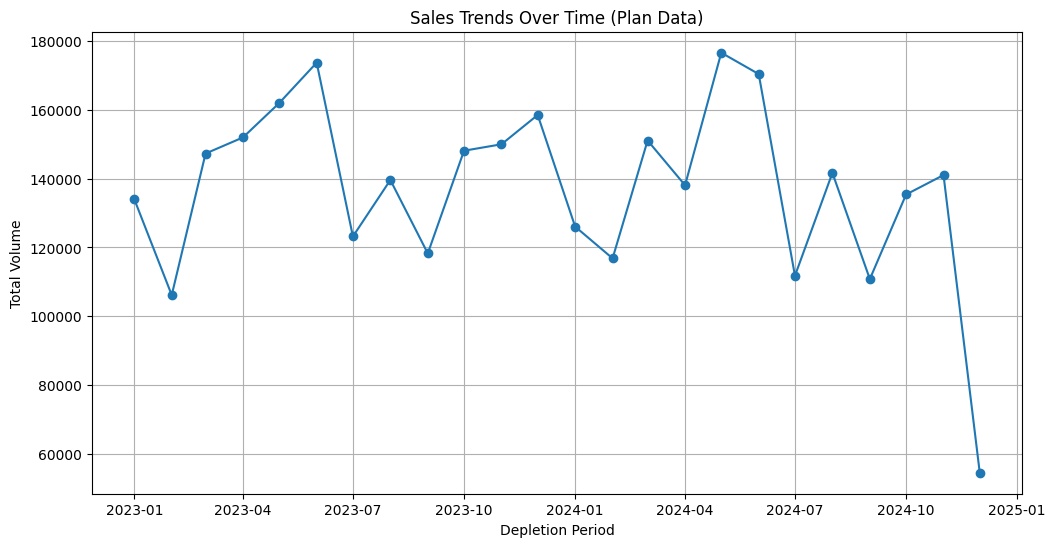

Analyzing trends for Forecast Data...


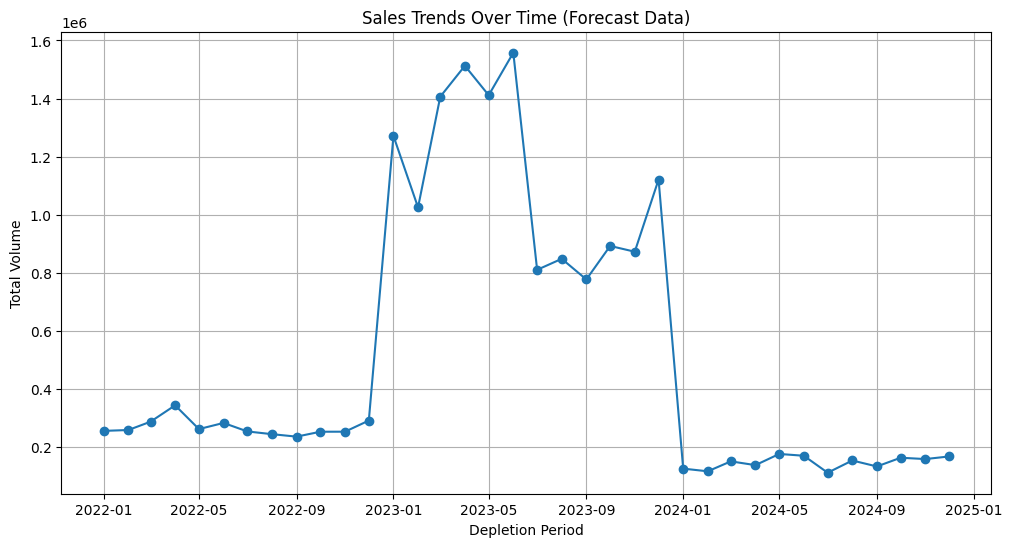

Analyzing trends for Actuals Data...


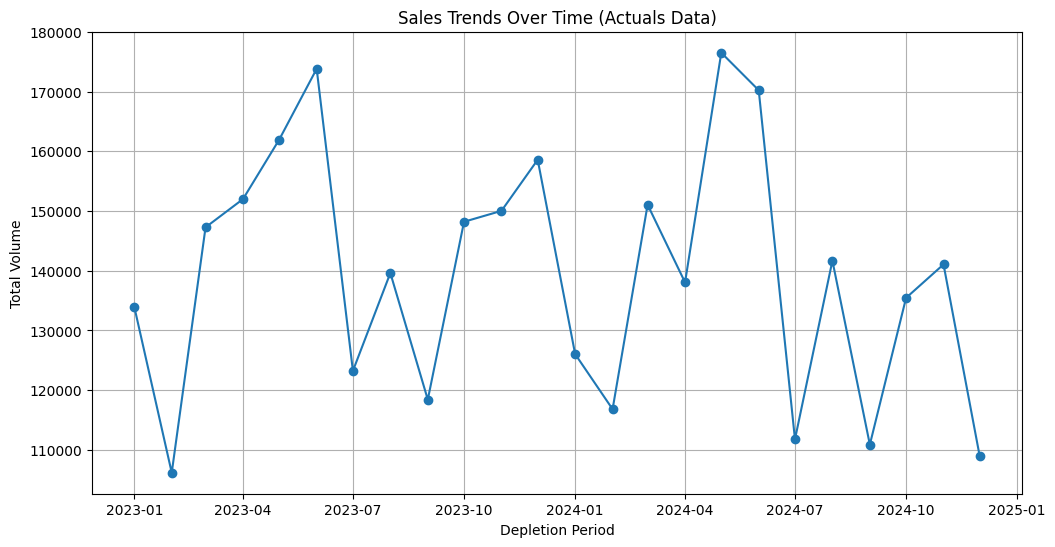


Identifying peak periods for Plan Data...

Peak periods (above 90th percentile):
   DEPLETION_PERIOD    PLAN_VOLUME
5        2023-06-01  173668.326036
16       2024-05-01  176555.426243
17       2024-06-01  170351.767005

Identifying peak periods for Forecast Data...

Peak periods (above 90th percentile):
   DEPLETION_PERIOD  FORECAST_VOLUME
14       2023-03-01     1.406368e+06
15       2023-04-01     1.512650e+06
16       2023-05-01     1.411394e+06
17       2023-06-01     1.557679e+06

Identifying peak periods for Actuals Data...

Peak periods (above 90th percentile):
   DEPLETION_PERIOD  ACTUAL_VOLUME
5        2023-06-01  173825.462123
16       2024-05-01  176518.970694
17       2024-06-01  170231.644785


In [118]:
import matplotlib.pyplot as plt

# Step 1: Analyze trends over time
def analyze_trends(data, volume_column, title):
    # Group by DEPLETION_PERIOD and calculate total volume
    trend_data = data.groupby('DEPLETION_PERIOD')[volume_column].sum().reset_index()

    # Plot the trend
    plt.figure(figsize=(12, 6))
    plt.plot(trend_data['DEPLETION_PERIOD'], trend_data[volume_column], marker='o')
    plt.title(f"Sales Trends Over Time ({title})")
    plt.xlabel("Depletion Period")
    plt.ylabel("Total Volume")
    plt.grid()
    plt.show()
    return trend_data

# Analyze trends for each dataset with the correct column names
print("Analyzing trends for Plan Data...")
plan_trends = analyze_trends(plan_data, "PLAN_VOLUME", "Plan Data")

print("Analyzing trends for Forecast Data...")
forecast_trends = analyze_trends(forecast_data, "FORECAST_VOLUME", "Forecast Data")

print("Analyzing trends for Actuals Data...")
actuals_trends = analyze_trends(actuals_data, "ACTUAL_VOLUME", "Actuals Data")

# Step 2: Identify peak sales periods
def identify_peak_periods(data, volume_column, threshold_percentile=90):
    # Calculate threshold for peak periods
    threshold = data[volume_column].quantile(threshold_percentile / 100.0)
    peak_periods = data[data[volume_column] > threshold]
    print(f"\nPeak periods (above {threshold_percentile}th percentile):")
    print(peak_periods)
    return peak_periods

# Identify peak sales periods for each dataset
print("\nIdentifying peak periods for Plan Data...")
plan_peaks = identify_peak_periods(plan_trends, "PLAN_VOLUME")

print("\nIdentifying peak periods for Forecast Data...")
forecast_peaks = identify_peak_periods(forecast_trends, "FORECAST_VOLUME")

print("\nIdentifying peak periods for Actuals Data...")
actuals_peaks = identify_peak_periods(actuals_trends, "ACTUAL_VOLUME")

Top Markets by Sales:
       MARKETS  ACTUAL_VOLUME
1      florida   1.843766e+06
2     illinois   1.247435e+06
0  connecticut   2.506537e+05
Top Distributors by Sales:
  ULTIMATE_DISTRIBUTORS  ACTUAL_VOLUME
4                  rndc   1.843766e+06
5                  sgws   1.247435e+06
2             eder bros   1.164060e+05
0      allan s. goodman   8.112080e+04
1       brescome barton   5.219332e+04
Unstable Markets (High Variance):
       MARKETS        mean          std  Coefficient_of_Variation
0  connecticut   27.702665   132.657222                478.860877
1      florida  355.664794  1383.884272                389.097908
2     illinois  245.172015  1000.661436                408.146679


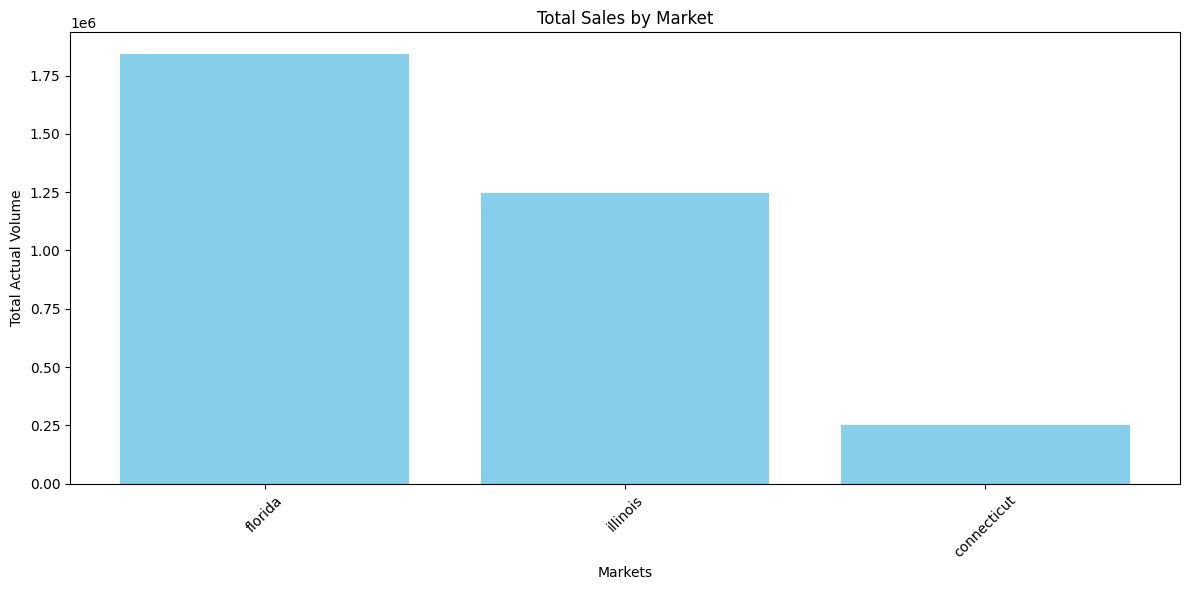

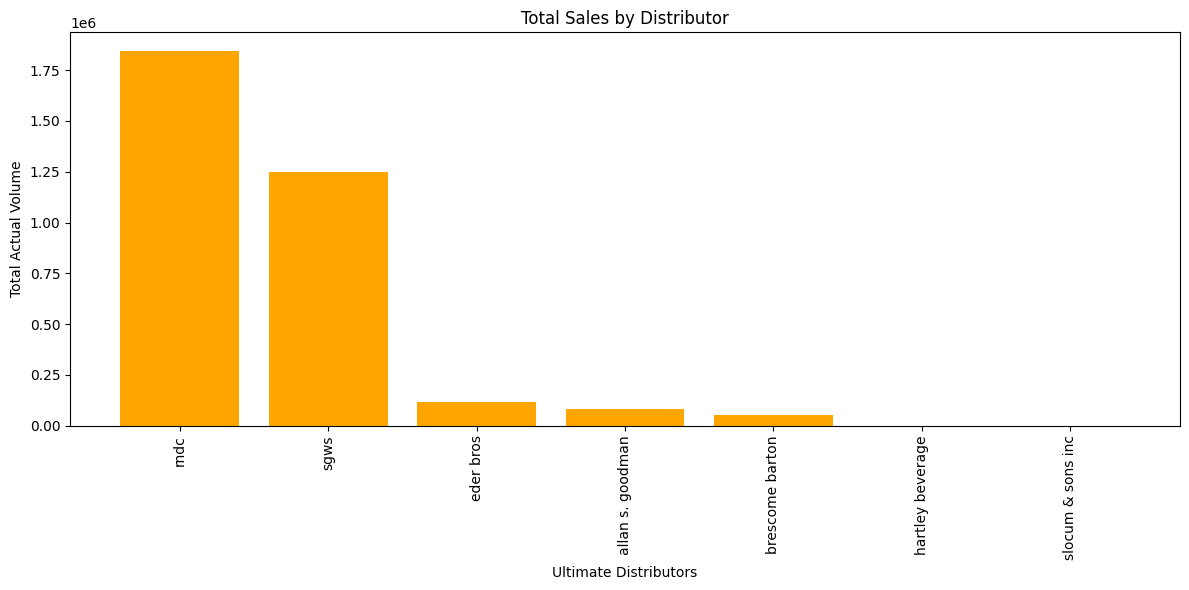

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# **1. Аналіз ринків**
# Групування за ринками
market_sales = actuals_data.groupby('MARKETS')['ACTUAL_VOLUME'].sum().reset_index()
market_sales = market_sales.sort_values(by='ACTUAL_VOLUME', ascending=False)

# Виведення топ-ринків
print("Top Markets by Sales:")
print(market_sales.head())

# **2. Аналіз дистриб’юторів**
# Групування за дистриб'юторами
distributor_sales = actuals_data.groupby('ULTIMATE_DISTRIBUTORS')['ACTUAL_VOLUME'].sum().reset_index()
distributor_sales = distributor_sales.sort_values(by='ACTUAL_VOLUME', ascending=False)

# Виведення топ-дистриб’юторів
print("Top Distributors by Sales:")
print(distributor_sales.head())

# **3. Визначення нестабільних ринків**
# Обчислення коефіцієнта варіації (CV)
market_variation = actuals_data.groupby('MARKETS')['ACTUAL_VOLUME'].agg(['mean', 'std']).reset_index()
market_variation['Coefficient_of_Variation'] = (market_variation['std'] / market_variation['mean']) * 100
unstable_markets = market_variation[market_variation['Coefficient_of_Variation'] > 50]

print("Unstable Markets (High Variance):")
print(unstable_markets)

# **4. Візуалізація продажів**
# Графік обсягів продажів по ринках
plt.figure(figsize=(12, 6))
plt.bar(market_sales['MARKETS'], market_sales['ACTUAL_VOLUME'], color='skyblue')
plt.title("Total Sales by Market")
plt.xlabel("Markets")
plt.ylabel("Total Actual Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Графік продажів по дистриб'юторах
plt.figure(figsize=(12, 6))
plt.bar(distributor_sales['ULTIMATE_DISTRIBUTORS'], distributor_sales['ACTUAL_VOLUME'], color='orange')
plt.title("Total Sales by Distributor")
plt.xlabel("Ultimate Distributors")
plt.ylabel("Total Actual Volume")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [120]:
actuals_data

,DEPLETION_PERIOD,BRANDS,LABELS,PRICING_STRATEGIES,SPIRIT_TYPES,ULTIMATE_DISTRIBUTORS,MARKETS,DIVISIONS,ACTUAL_VOLUME,Is_Holiday
0,2023-01-01,jc especial,jce silver,jose cuervo especial silver,tequila,rndc,florida,rndc east,9251.678437,0
1,2023-01-01,jc especial,jce silver,jose cuervo especial silver,tequila,sgws,illinois,sgws-jb,12706.277449,0
2,2023-01-01,jc especial,jce silver,jose cuervo especial silver,tequila,eder bros,connecticut,independent,1580.528075,0
3,2023-01-01,jc especial,jce silver,jose cuervo especial silver,tequila,allan s. goodman,connecticut,independent,983.105733,0
4,2023-01-01,jc especial,jce silver,jose cuervo especial silver,tequila,brescome barton,connecticut,independent,511.252879,0
...,...,...,...,...,...,...,...,...,...,...
19315,2024-12-01,lola belle,lola belle cherry,lola belle cherry,rum,sgws,illinois,sgws-jb,0.000000,0
19316,2024-12-01,virginia black,virginia black,virginia black,whiskey,eder bros,connecticut,independent,0.000000,0
19317,2024-12-01,virginia black,virginia black,virginia black,whiskey,sgws,illinois,sgws-jb,0.000000,0
19318,2024-12-01,birdwells vodka,birdwells vodka,birdwells vodka,vodka,sgws,illinois,sgws-jb,0.000000,0


/home/yan/PycharmProjects/sales_forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 2/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 3/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0012 - val_loss: 9.1884e-04
Epoch 5/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 9.4710e-04 - val_loss: 7.2849e-04
Epoch 6/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 9.1365e-04 - val_loss: 6.6788e-04
Epoch 7/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0010 - val_loss: 6.3882e-04
Epoch 8/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 8.2919e-04 - val_loss: 7.2990e-04
Epoch 9/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 7.3332e-04 - val_loss: 5.3490e-04
Epoch 10/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 6.0144e-04 - val_loss: 6.6814e-04
Epoch 11/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 7.3700e-0

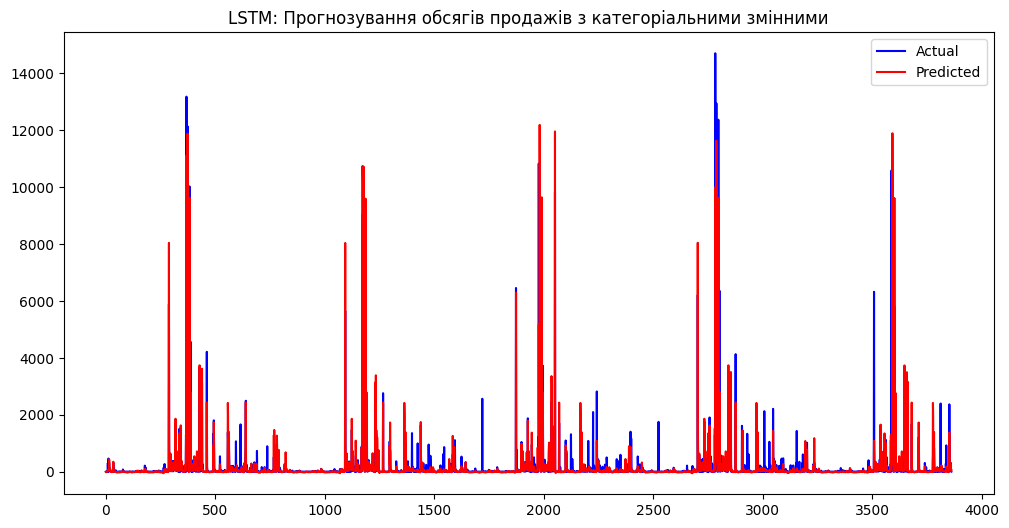

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Завантаження даних
data = actuals_data
data['DEPLETION_PERIOD'] = pd.to_datetime(data['DEPLETION_PERIOD'])
data.sort_values('DEPLETION_PERIOD', inplace=True)

# Перевірка дублікатів і відсутніх значень
data.drop_duplicates(inplace=True)
data['ACTUAL_VOLUME'].fillna(method='ffill', inplace=True)

# Обробка категоріальних змінних
categorical_features = ['BRANDS', 'LABELS', 'PRICING_STRATEGIES', 'SPIRIT_TYPES',
                        'ULTIMATE_DISTRIBUTORS', 'MARKETS', 'DIVISIONS']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)

# Об'єднання оброблених даних
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=categorical_features, inplace=True)

# Масштабування даних
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.drop(columns=['DEPLETION_PERIOD']).values)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:], index=data.index)

# Створення часових рядів
look_back = 12
X, y = [], []
for i in range(len(data_scaled) - look_back):
    X.append(data_scaled.iloc[i:i+look_back].values)
    y.append(data_scaled.iloc[i+look_back, data.columns.get_loc('ACTUAL_VOLUME') - 1])
X, y = np.array(X), np.array(y)

# Розділення на тренувальний та тестовий набори
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Побудова моделі LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Компіляція моделі
model.compile(optimizer='adam', loss='mse')

# Тренування моделі
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Прогнозування
y_pred = model.predict(X_test)

# Зворотне масштабування для оцінки метрик
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[data.columns.get_loc('ACTUAL_VOLUME') - 1], scaler.scale_[data.columns.get_loc('ACTUAL_VOLUME') - 1]

y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

# Оцінка ефективності моделі
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"LSTM MAE: {mae}")
print(f"LSTM RMSE: {rmse}")
print(f"LSTM R²: {r2}")

# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label="Actual", color='blue')
plt.plot(range(len(y_pred_rescaled)), y_pred_rescaled, label="Predicted", color='red')
plt.title("LSTM: Прогнозування обсягів продажів з категоріальними змінними")
plt.legend()
plt.show()

In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import load_model

# Завантаження даних
data = pd.read_csv("actuals_data.csv")
data['DEPLETION_PERIOD'] = pd.to_datetime(data['DEPLETION_PERIOD'])
data.sort_values('DEPLETION_PERIOD', inplace=True)

# Перевірка дублікатів і відсутніх значень
data.drop_duplicates(inplace=True)
data['ACTUAL_VOLUME'].fillna(method='ffill', inplace=True)

# Обробка категоріальних змінних
categorical_features = ['BRANDS', 'LABELS', 'PRICING_STRATEGIES', 'SPIRIT_TYPES',
                        'ULTIMATE_DISTRIBUTORS', 'MARKETS', 'DIVISIONS']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)

# Об'єднання оброблених даних
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded.drop(columns=categorical_features, inplace=True)

# Масштабування даних
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_encoded.drop(columns=['DEPLETION_PERIOD']).values)
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns[1:], index=data_encoded.index)

# Ініціалізація фінального DataFrame для результатів
final_results = pd.DataFrame()

# Групування за унікальними комбінаціями товарів
group_columns = ['BRANDS', 'LABELS', 'PRICING_STRATEGIES', 'SPIRIT_TYPES',
                 'ULTIMATE_DISTRIBUTORS', 'MARKETS', 'DIVISIONS']

for group_key, group_data in data.groupby(group_columns):
    # Масштабування даних для групи
    group_data_encoded = data_encoded.loc[group_data.index]
    group_data_scaled = scaler.transform(group_data_encoded.drop(columns=['DEPLETION_PERIOD']).values)

    # Підготовка вікна для прогнозу
    look_back = 12
    last_window = group_data_scaled[-look_back:]  # Останнє "вікно"
    predictions = []

    # Прогнозування на 24 місяці вперед
    for _ in range(24):
        prediction = model.predict(last_window.reshape(1, look_back, -1), verbose=0)[0, 0]
        predictions.append(prediction)
        new_row = np.zeros_like(last_window[0])
        new_row[:-1] = last_window[-1, :-1]
        new_row[-1] = prediction
        last_window = np.vstack([last_window[1:], new_row])

    # Зворотне масштабування прогнозу
    predictions_rescaled = scaler.inverse_transform(
        np.hstack([
            np.zeros((24, last_window.shape[1] - 1)),
            np.array(predictions).reshape(-1, 1)
        ])
    )[:, -1]

    # Створення нових дат для прогнозу
    forecast_dates = pd.date_range(
        start=group_data['DEPLETION_PERIOD'].max() + pd.DateOffset(months=1),
        periods=24,
        freq='MS'
    )

    # Формування результатів для цієї групи
    forecast_data = pd.DataFrame({
        'DEPLETION_PERIOD': forecast_dates,
        'ACTUAL_VOLUME': predictions_rescaled
    })
    for col, value in zip(group_columns, group_key):
        forecast_data[col] = value

    # Додавання до фінального результату
    final_results = pd.concat([final_results, forecast_data], ignore_index=True)

# Збереження результатів
final_results.to_csv("forecast_2025_2026_grouped.csv", index=False)
print("Прогноз збережено у файл 'forecast_2025_2026_grouped.csv'")

Прогноз збережено у файл 'forecast_2025_2026_grouped.csv'


12:40:04 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 1.02
Prophet RMSE: 1.23
Prophet R²: 1.00


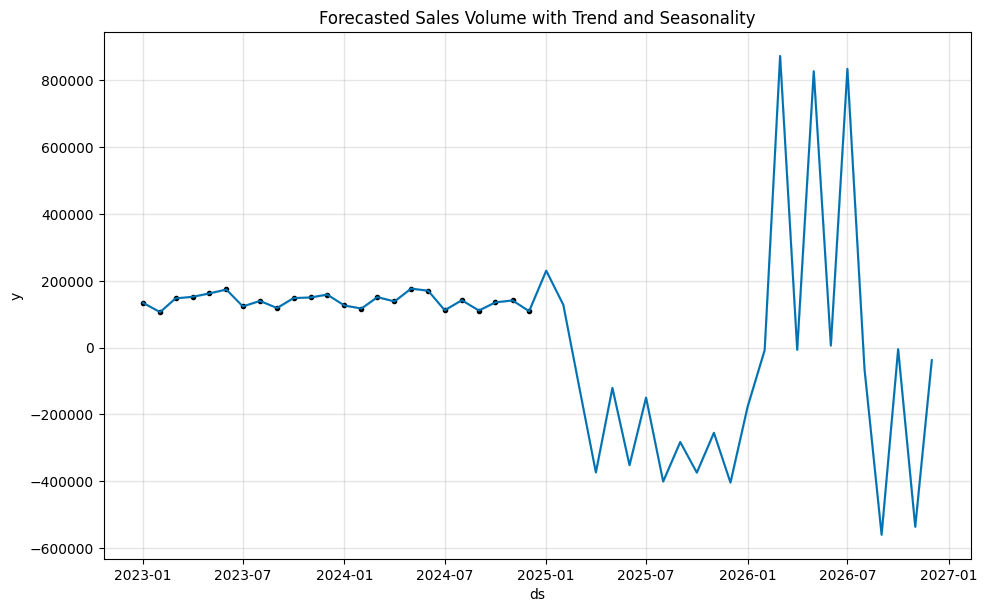

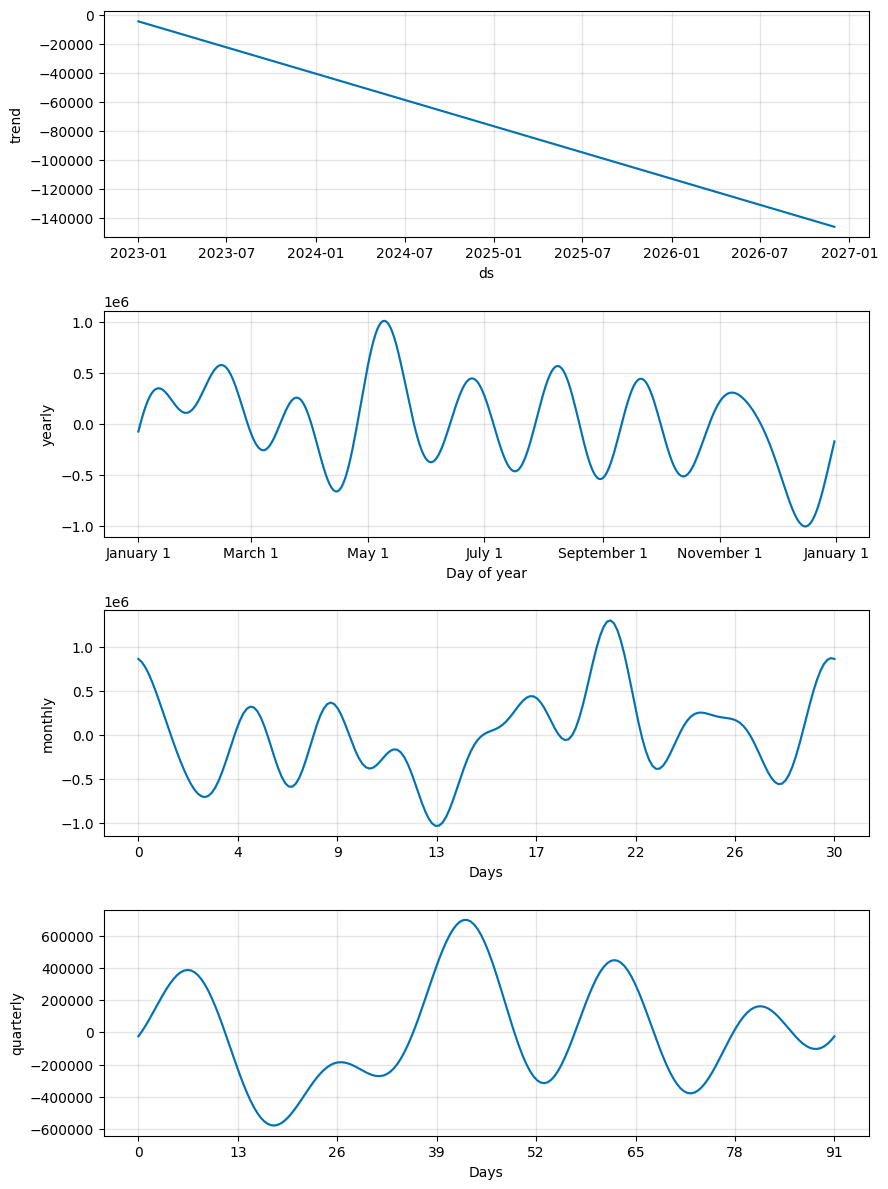

Аналіз трендів та сезонності збережено у файл 'improved_trend_seasonality_analysis.csv'.


In [129]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Завантаження даних
data = pd.read_csv("actuals_data.csv")
data['DEPLETION_PERIOD'] = pd.to_datetime(data['DEPLETION_PERIOD'])
data.sort_values('DEPLETION_PERIOD', inplace=True)

# Агрегація даних (якщо потрібно)
aggregated_data = data.groupby('DEPLETION_PERIOD')['ACTUAL_VOLUME'].sum().reset_index()

# Підготовка даних для Prophet
prophet_data = aggregated_data.rename(columns={'DEPLETION_PERIOD': 'ds', 'ACTUAL_VOLUME': 'y'})

# Ініціалізація моделі Prophet
prophet_model = Prophet(
    yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False,
    changepoint_prior_scale=0.1  # Регулювання трендових змін
)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=10)
prophet_model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Навчання моделі
prophet_model.fit(prophet_data)

# Створення майбутнього датафрейму для прогнозу
future = prophet_model.make_future_dataframe(periods=24, freq='MS')
forecast = prophet_model.predict(future)

# Оцінка метрик
y_true = prophet_data['y']
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet RMSE: {rmse:.2f}")
print(f"Prophet R²: {r2:.2f}")

# Візуалізація прогнозу
fig = prophet_model.plot(forecast)
plt.title("Forecasted Sales Volume with Trend and Seasonality")
plt.show()

# Візуалізація компонентів
fig_components = prophet_model.plot_components(forecast)
plt.show()

# Збереження прогнозу
forecast[['ds', 'yhat', 'trend', 'yearly']].to_csv("improved_trend_seasonality_analysis.csv", index=False)
print("Аналіз трендів та сезонності збережено у файл 'improved_trend_seasonality_analysis.csv'.")

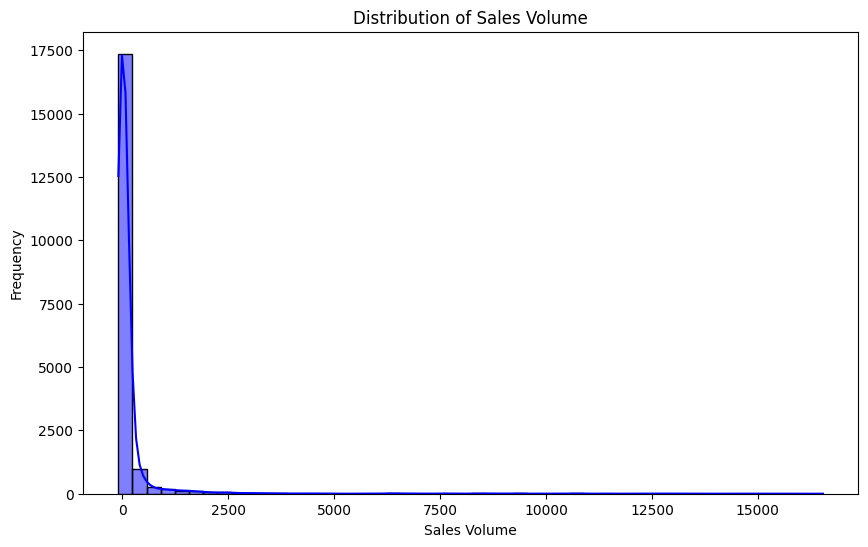

Low volume: less than 0.083334
Medium volume: between 0.083334 and 15.25001308
High volume: greater than 15.25001308


/tmp/ipykernel_34131/1444504598.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MARKET_CLASS', y='ACTUAL_VOLUME', data=sales_data, palette='Set2')


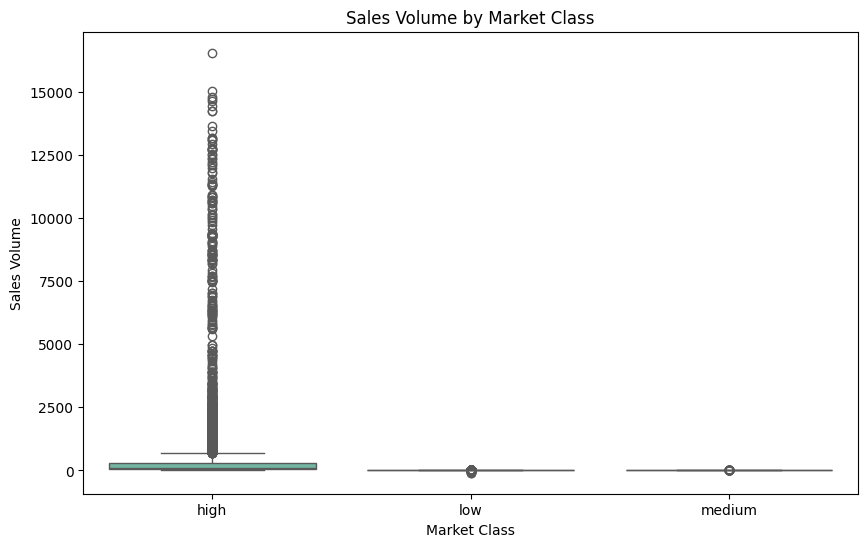

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
sales_data = pd.read_csv("actuals_data.csv")

# Аналіз розподілу обсягів продажів
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['ACTUAL_VOLUME'], bins=50, kde=True, color='blue')
plt.title("Distribution of Sales Volume")
plt.xlabel("Sales Volume")
plt.ylabel("Frequency")
plt.show()

# Обчислення квантилів
q1 = sales_data['ACTUAL_VOLUME'].quantile(0.33)
q2 = sales_data['ACTUAL_VOLUME'].quantile(0.66)

print(f"Low volume: less than {q1}")
print(f"Medium volume: between {q1} and {q2}")
print(f"High volume: greater than {q2}")

# Додавання класу
def classify_volume(volume):
    if volume < q1:
        return "low"
    elif q1 <= volume <= q2:
        return "medium"
    else:
        return "high"

sales_data['MARKET_CLASS'] = sales_data['ACTUAL_VOLUME'].apply(classify_volume)

# Візуалізація класифікації
plt.figure(figsize=(10, 6))
sns.boxplot(x='MARKET_CLASS', y='ACTUAL_VOLUME', data=sales_data, palette='Set2')
plt.title("Sales Volume by Market Class")
plt.xlabel("Market Class")
plt.ylabel("Sales Volume")
plt.show()

/home/yan/PycharmProjects/sales_forecast/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


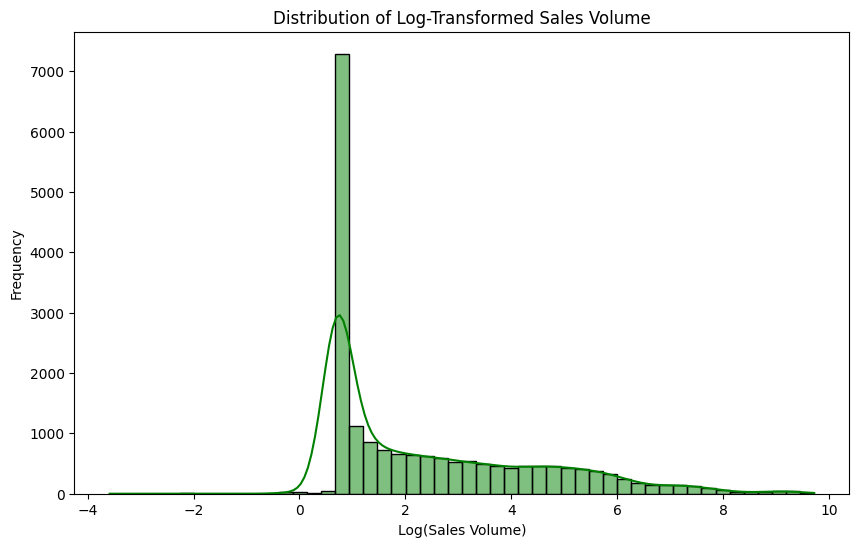

Low volume: less than 1.08
Medium volume: between 1.08 and 16.36
High volume: greater than 16.36


/tmp/ipykernel_34131/3148818350.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MARKET_CLASS', y='ACTUAL_VOLUME', data=sales_data, palette='Set2')


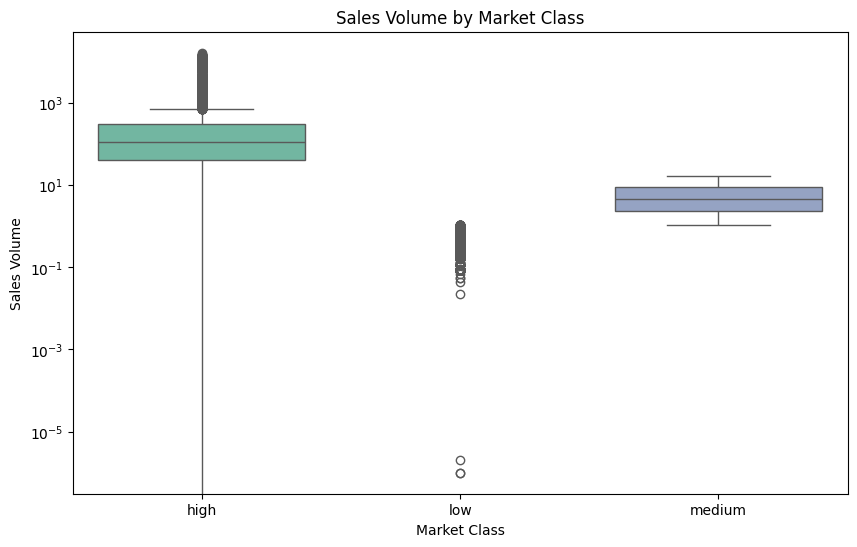

In [133]:
import numpy as np

# Додавання логарифмічної змінної
sales_data['LOG_ACTUAL_VOLUME'] = np.log1p(sales_data['ACTUAL_VOLUME'] + 1)

# Візуалізація розподілу логарифмованих обсягів продажів
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['LOG_ACTUAL_VOLUME'], bins=50, kde=True, color='green')
plt.title("Distribution of Log-Transformed Sales Volume")
plt.xlabel("Log(Sales Volume)")
plt.ylabel("Frequency")
plt.show()

# Оновлення класифікації
q1 = sales_data['LOG_ACTUAL_VOLUME'].quantile(0.33)
q2 = sales_data['LOG_ACTUAL_VOLUME'].quantile(0.66)

print(f"Low volume: less than {np.expm1(q1):.2f}")
print(f"Medium volume: between {np.expm1(q1):.2f} and {np.expm1(q2):.2f}")
print(f"High volume: greater than {np.expm1(q2):.2f}")

def classify_volume(volume):
    log_volume = np.log1p(volume)
    if log_volume < q1:
        return "low"
    elif q1 <= log_volume <= q2:
        return "medium"
    else:
        return "high"

sales_data['MARKET_CLASS'] = sales_data['ACTUAL_VOLUME'].apply(classify_volume)

# Візуалізація класифікації
plt.figure(figsize=(10, 6))
sns.boxplot(x='MARKET_CLASS', y='ACTUAL_VOLUME', data=sales_data, palette='Set2')
plt.title("Sales Volume by Market Class")
plt.xlabel("Market Class")
plt.ylabel("Sales Volume")
plt.yscale('log')  # Логарифмічна шкала для Y-вісі
plt.show()

/home/yan/PycharmProjects/sales_forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00      1300
         low       1.00      1.00      1.00      1618
      medium       1.00      1.00      1.00       946

    accuracy                           1.00      3864
   macro avg       1.00      1.00      1.00      3864
weighted avg       1.00      1.00      1.00      3864



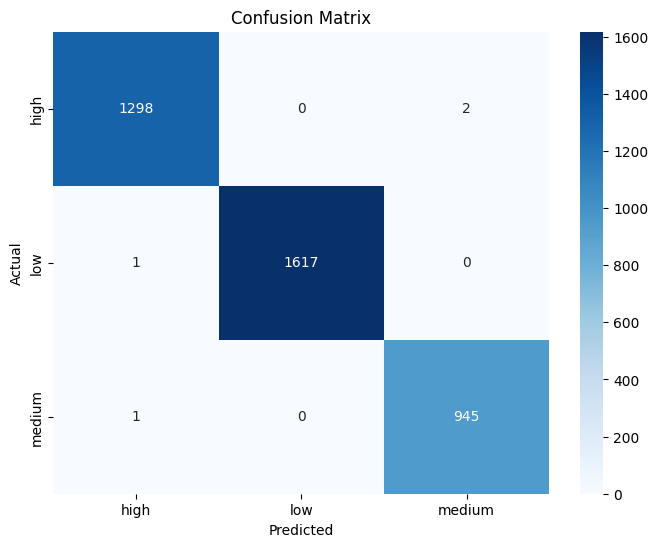

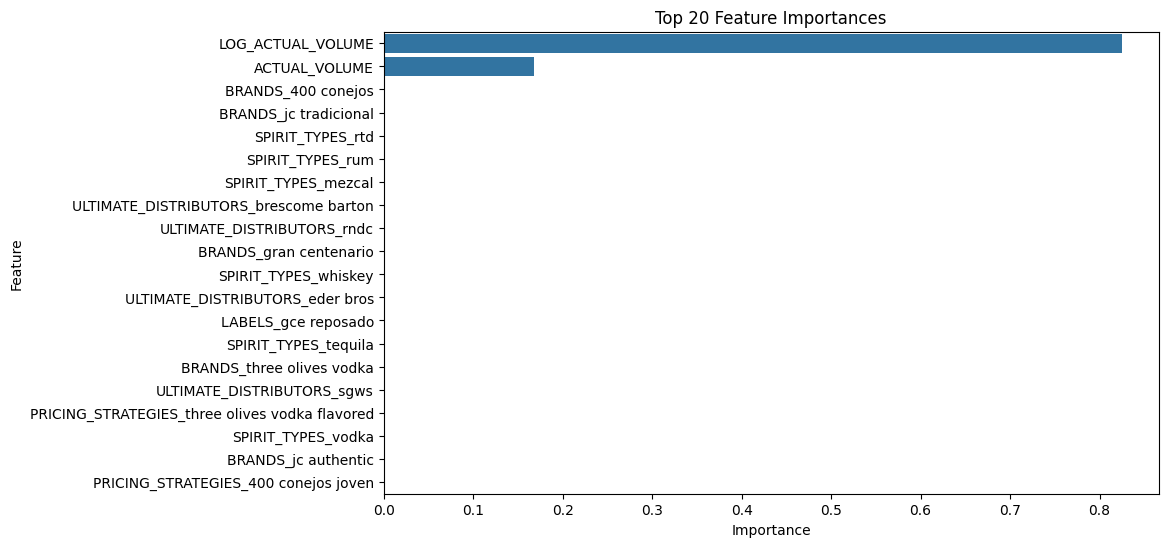

In [137]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Обробка категоріальних змінних
categorical_features = ['BRANDS', 'LABELS', 'PRICING_STRATEGIES', 'SPIRIT_TYPES',
                        'ULTIMATE_DISTRIBUTORS', 'MARKETS', 'DIVISIONS']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(sales_data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=sales_data.index)

# Об'єднання оброблених даних
sales_data_encoded = pd.concat([sales_data.drop(columns=categorical_features), encoded_df], axis=1)

# Розділення на цільову змінну і фічі
X = sales_data_encoded.drop(columns=['MARKET_CLASS', 'DEPLETION_PERIOD'])
y = sales_data_encoded['MARKET_CLASS']

# Кодування цільової змінної
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Розділення даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Створення моделі XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Тренування моделі
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка ефективності моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Матриця плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Важливість фічей
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(20), x='Importance', y='Feature')
plt.title("Top 20 Feature Importances")
plt.show()

/home/yan/PycharmProjects/sales_forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00      1588
      medium       1.00      0.99      1.00       998
        high       0.99      1.00      1.00      1278

    accuracy                           1.00      3864
   macro avg       1.00      1.00      1.00      3864
weighted avg       1.00      1.00      1.00      3864



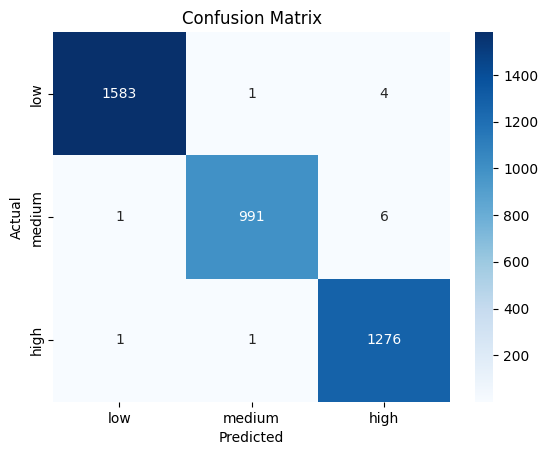

/home/yan/PycharmProjects/sales_forecast/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Класифікація ринків на 2 роки вперед збережена у файлі 'xgboost_future_classification.csv'.


In [146]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Дані після обробки з попереднього коду
sales_data = sales_data.copy()  # Зміна назви для уникнення конфліктів

# 1. Підготовка даних
categorical_features = ['BRANDS', 'LABELS', 'PRICING_STRATEGIES', 'SPIRIT_TYPES', 
                        'ULTIMATE_DISTRIBUTORS', 'MARKETS', 'DIVISIONS']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(sales_data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=sales_data.index)

# Об'єднання оброблених даних
sales_data_full = pd.concat([sales_data, encoded_df], axis=1)
sales_data_full.drop(columns=categorical_features, inplace=True)

# Масштабування даних
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sales_data_full.drop(columns=['DEPLETION_PERIOD', 'ACTUAL_VOLUME', 'MARKET_CLASS']).values)
training_columns = sales_data_full.drop(columns=['DEPLETION_PERIOD', 'ACTUAL_VOLUME', 'MARKET_CLASS']).columns
scaled_data_df = pd.DataFrame(scaled_data, columns=training_columns, index=sales_data_full.index)

# Додавання цільової змінної
scaled_data_df['MARKET_CLASS'] = sales_data_full['MARKET_CLASS']

# Розділення даних на тренувальний і тестовий набори
X = scaled_data_df.drop(columns=['MARKET_CLASS']).values
y = scaled_data_df['MARKET_CLASS'].map({'low': 0, 'medium': 1, 'high': 2}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Тренування моделі
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 3. Оцінка моделі
y_pred = xgb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))

# Матриця плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4. Підготовка майбутніх даних для прогнозу
future_data = sales_data.copy()
future_data['DEPLETION_PERIOD'] = pd.to_datetime(future_data['DEPLETION_PERIOD'])
future_data = future_data[future_data['DEPLETION_PERIOD'] < '2025-01-01']
future_data['DEPLETION_PERIOD'] += pd.DateOffset(years=2)

# One-hot encoding для майбутніх даних
future_encoded_features = encoder.transform(future_data[categorical_features])
future_encoded_df = pd.DataFrame(future_encoded_features, columns=encoded_feature_names, index=future_data.index)
future_full = pd.concat([future_data, future_encoded_df], axis=1)
future_full.drop(columns=categorical_features, inplace=True)

# Узгодження колонок
missing_columns = set(training_columns) - set(future_full.columns)
for col in missing_columns:
    future_full[col] = 0

extra_columns = set(future_full.columns) - set(training_columns)
future_full.drop(columns=extra_columns, inplace=True)
future_full = future_full[training_columns]

# Масштабування даних
future_scaled = scaler.transform(future_full)

# 5. Передбачення класів на 2 роки вперед
predicted_classes = xgb_model.predict(future_scaled)
class_mapping = {0: 'low', 1: 'medium', 2: 'high'}
future_data['MARKET_CLASS'] = [class_mapping[pred] for pred in predicted_classes]

# 6. Збереження результатів
future_data.to_csv('xgboost_future_classification.csv', index=False)
print("Класифікація ринків на 2 роки вперед збережена у файлі 'xgboost_future_classification.csv'.")

In [156]:
import pandas as pd

# Завантаження даних із файлу
forecast_data = pd.read_csv("forecast_lstm.csv")

# Для прикладу, додамо дані про початковий рівень запасів
forecast_data['INITIAL_STOCK'] = forecast_data['FORECASTED_VOLUME'] * 10  # Симуляція початкових запасів
forecast_data['CURRENT_STOCK'] = forecast_data['FORECASTED_VOLUME'] * 2   # Симуляція поточних запасів

# Розраховуємо рівень запасів у відсотках
forecast_data['STOCK_LEVEL_PERCENT'] = (forecast_data['CURRENT_STOCK'] / forecast_data['INITIAL_STOCK']) * 100

# Фільтруємо дистриб'юторів із запасами <25%
low_stock_distributors = forecast_data[forecast_data['STOCK_LEVEL_PERCENT'] < 25]

# Перевірка, чи є дистриб'ютори з низьким рівнем запасів
if low_stock_distributors.empty:
    print("\nУсі дистриб'ютори мають запаси >=25%.")
else:
    # Додаємо рекомендації для поповнення запасів
    low_stock_distributors['REPLENISH_STOCK'] = low_stock_distributors['INITIAL_STOCK'] - low_stock_distributors['CURRENT_STOCK']

    # Групуємо дані за дистриб'юторами
    final_low_stock = low_stock_distributors.groupby('ULTIMATE_DISTRIBUTORS').agg(
        TOTAL_INITIAL_STOCK=('INITIAL_STOCK', 'sum'),
        TOTAL_CURRENT_STOCK=('CURRENT_STOCK', 'sum'),
        REPLENISH_STOCK=('REPLENISH_STOCK', 'sum')
    ).reset_index()

    # Збереження результатів у файл
    final_low_stock.to_csv("low_stock_distributors.csv", index=False)

    # Вивід результатів
    print("\nДистриб'ютори з низьким рівнем запасів (<25%):")
    print(final_low_stock)

    print("\nСписок для поповнення запасів збережено у файл 'low_stock_distributors.csv'.")


Дистриб'ютори з низьким рівнем запасів (<25%):
  ULTIMATE_DISTRIBUTORS  TOTAL_INITIAL_STOCK  TOTAL_CURRENT_STOCK  \
0      allan s. goodman           934.459658           186.891932   
1       brescome barton          1390.405882           278.081176   
2             eder bros           963.043677           192.608735   
3      hartley beverage            14.117005             2.823401   
4                  rndc          1011.027443           202.205489   
5                  sgws          2113.043036           422.608607   
6     slocum & sons inc            11.912099             2.382420   

   REPLENISH_STOCK  
0       747.567726  
1      1112.324706  
2       770.434941  
3        11.293604  
4       808.821955  
5      1690.434429  
6         9.529679  

Список для поповнення запасів збережено у файл 'low_stock_distributors.csv'.


In [157]:
import pandas as pd

# Завантаження даних
brand_data = pd.read_csv("forecast_lstm.csv")

# Додавання початкового рівня запасів для симуляції
brand_data['INITIAL_STOCK'] = brand_data['FORECASTED_VOLUME'] * 10  # Наприклад, множимо на 10
brand_data['CURRENT_STOCK'] = brand_data['FORECASTED_VOLUME'] * 2   # Наприклад, множимо на 2

# 1. Top brands by total volume
top_brands = brand_data.groupby('BRANDS').agg(
    TOTAL_VOLUME=('FORECASTED_VOLUME', 'sum')
).sort_values('TOTAL_VOLUME', ascending=False).reset_index()

# Збереження топ брендів
top_brands.to_csv("top_brands_by_volume.csv", index=False)
print("Топ бренди за обсягом:")
print(top_brands.head(10))  # Відображення 10 найкращих брендів

# 2. Аналіз продуктивності брендів по кожному ринку
performance_by_market = brand_data.groupby(['MARKETS', 'BRANDS']).agg(
    TOTAL_VOLUME=('FORECASTED_VOLUME', 'sum')
).reset_index()

# Визначення найкращих і найгірших брендів для кожного ринку
best_performers = performance_by_market.loc[
    performance_by_market.groupby('MARKETS')['TOTAL_VOLUME'].idxmax()
]
worst_performers = performance_by_market.loc[
    performance_by_market.groupby('MARKETS')['TOTAL_VOLUME'].idxmin()
]

# Збереження результатів аналізу
best_performers.to_csv("best_performers_by_market.csv", index=False)
worst_performers.to_csv("worst_performers_by_market.csv", index=False)

print("\nНайкращі бренди по кожному ринку:")
print(best_performers)

print("\nНайгірші бренди по кожному ринку:")
print(worst_performers)

print("\nАналіз продуктивності брендів завершено. Результати збережено в файли.")

Топ бренди за обсягом:
               BRANDS  TOTAL_VOLUME
0        jc authentic    164.014877
1  three olives vodka    100.101937
2        1800 tequila     77.271718
3         jc especial     47.553864
4  1800 ult margarita     39.439399
5       ron matusalem     30.964930
6        jc sparkling     28.569917
7          kraken rum     22.262153
8      jc tradicional     21.704405
9       maestro dobel     16.167189

Найкращі бренди по кожному ринку:
        MARKETS              BRANDS  TOTAL_VOLUME
16  connecticut        jc authentic     69.808088
76      florida  three olives vodka     24.843012
95     illinois        jc authentic     90.403807

Найгірші бренди по кожному ринку:
         MARKETS              BRANDS  TOTAL_VOLUME
15   connecticut  jc 250 aniversario      0.108921
65       florida  kraken ginger beer      0.125147
119     illinois           wolf moon      0.095541

Аналіз продуктивності брендів завершено. Результати збережено в файли.
